# Imports/setting up directories
Note: I'm using the dark grid style for seaborn (my prefered plotting library)

In [1]:
%load_ext jupyter_black
# Utilities
import os
from pathlib import Path

# Data handling / generic ML
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CWD = Path(os.getcwd())
DATA = CWD / "data"
CORPUS_FILES = DATA / "corpus_files"
EDA = CWD / "eda"
SUBMISION_METRICS = EDA / "doc_submission_metrics"

In [3]:
EDA.mkdir(parents=True, exist_ok=True)
SUBMISION_METRICS.mkdir(parents=True, exist_ok=True)

# Exploratory data analysis

In [4]:
doc_corpus_path = CORPUS_FILES / "document_corpus.pkl"
doc_df: pd.DataFrame = pd.read_pickle(doc_corpus_path)
doc_df = doc_df[~doc_df["submission_flair"].isna()].copy()
doc_df = doc_df.sort_values(by="UID")
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   UID                        3201 non-null   int16         
 1   clean_text                 3201 non-null   object        
 2   num_sections               3201 non-null   int64         
 3   credit_text                3201 non-null   object        
 4   num_credit_sections        3201 non-null   int64         
 5   clean_word_tokens          3201 non-null   object        
 6   credit_word_tokens         3201 non-null   object        
 7   link                       3201 non-null   object        
 8   submission_author          3189 non-null   object        
 9   submission_id              3201 non-null   object        
 10  submission_title           3201 non-null   object        
 11  subreddit                  3201 non-null   category      
 12  submis

In [5]:
print(f"\nFlair categories: {', '.join(doc_df['submission_flair'].unique())}")


Flair categories: Item, Subclass, Spell, Monster, Class, Compendium, Race, Mechanic, Feat, Background


# Exploring text variety

### Let's check/do a few things...
1. Overall flair/class balance
2. How many authors are represented and how many texts exist per author
3. If there are any interesting relationships between flair/class and factors like upvotes or post date
4. Visualize some metrics word/sentences length, character usage, etc.
5. Generate wordclouds to visualize term frequencies by class

## Check general class balance

In [6]:
doc_df.groupby(by=["submission_flair"])["UID"].agg("count")

submission_flair
Background       7
Class          478
Compendium     152
Feat           122
Item           166
Mechanic       104
Monster        562
Race           229
Spell          194
Subclass      1187
Name: UID, dtype: int64

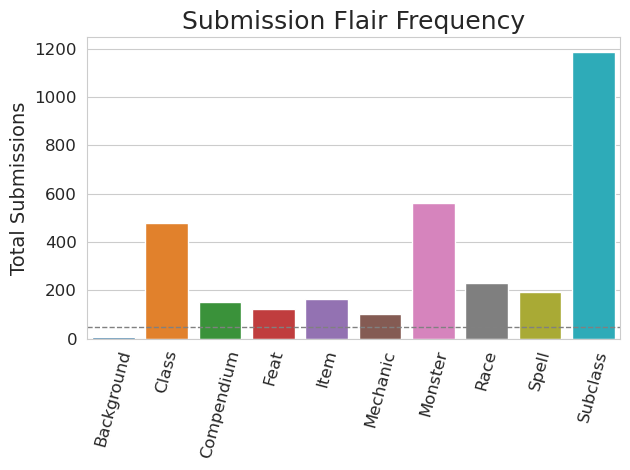

In [7]:
flair_labels, flair_counts = np.unique(
    doc_df["submission_flair"].values, return_counts=True
)
sns.plotting_context("notebook")
sns.barplot(x=flair_labels, y=flair_counts)
plt.title("Submission Flair Frequency", fontsize=18)
plt.ylabel("Total Submissions", fontsize=14)
plt.axhline(y=50, color="gray", linestyle="--", linewidth=1)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'flair_frequency_bar.pdf'}");

## Exploring Authorship

The main goal here will be to understand how many authors are represented in this dataset.

Where authors have more than one contribution, I'll attempt to find if any represent repeat examples.


In [8]:
total_texts = doc_df["submission_author"].size
unique_authors = doc_df["submission_author"].nunique()
print(f"{unique_authors} authors, {total_texts} texts")
author_counts = doc_df["submission_author"].value_counts()

1269 authors, 3201 texts


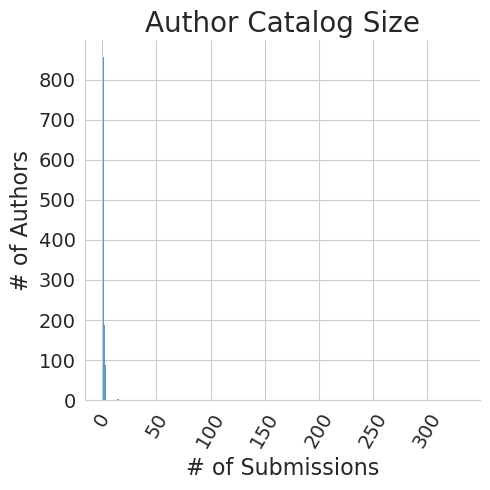

In [9]:
author_counts = doc_df["submission_author"].value_counts()
sns.displot(author_counts)
plt.title("Author Catalog Size", fontsize=20)
plt.ylabel("# of Authors", fontsize=16)
plt.xlabel("# of Submissions", fontsize=16)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'author_distribution.pdf'}")

### Most authors are unique, let's look at the spread of those who contributed more than once, specifically.

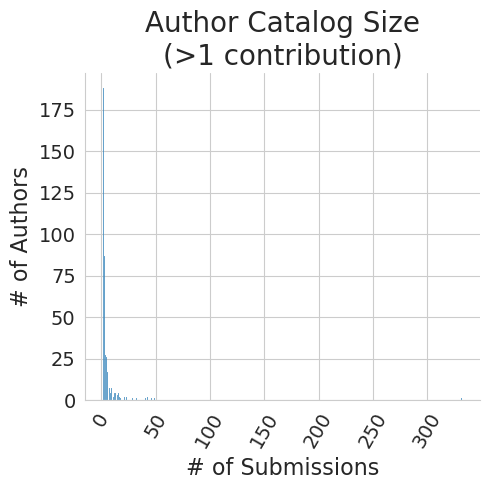

In [10]:
sns.displot(author_counts[author_counts > 1])
plt.title("Author Catalog Size\n(>1 contribution)", fontsize=20)
plt.ylabel("# of Authors", fontsize=16)
plt.xlabel("# of Submissions", fontsize=16)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'repeat_author_distribution.pdf'}")

# Distribution of flair over time

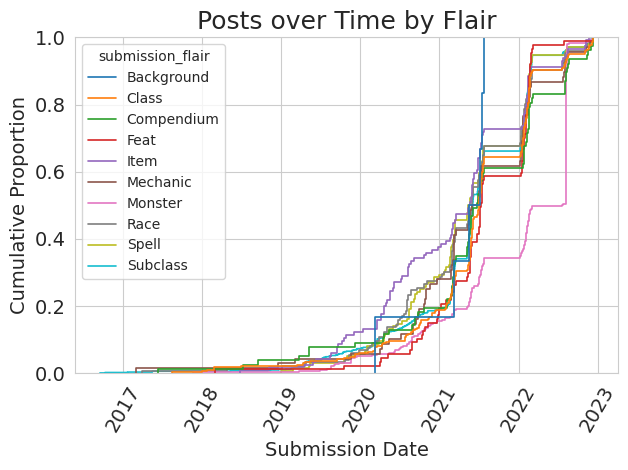

In [11]:
sns.ecdfplot(
    data=doc_df[~doc_df["submission_date"].isna()],
    x="submission_date",
    hue="submission_flair",
    linewidth=1.2,
)
plt.title("Posts over Time by Flair", fontsize=18)
plt.ylabel("Cumulative Proportion", fontsize=14)
plt.xlabel("Submission Date", fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'flair_ecdf_datetime.pdf'}")

# 

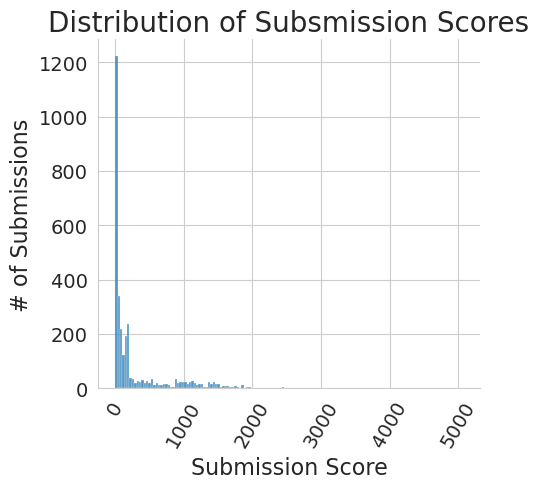

In [12]:
sns.displot(data=doc_df, x="submission_score")
plt.title("Distribution of Subsmission Scores", fontsize=20)
plt.ylabel("# of Submissions", fontsize=16)
plt.xlabel("Submission Score", fontsize=16)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_dist.pdf'}")

## Submission Score
It's worth noting that the real submission scores (total net upvotes) are obfuscated with some random noise on Reddit to prevent manipulation.

However, comparing subflair averages should be meaningful for informal purposes.

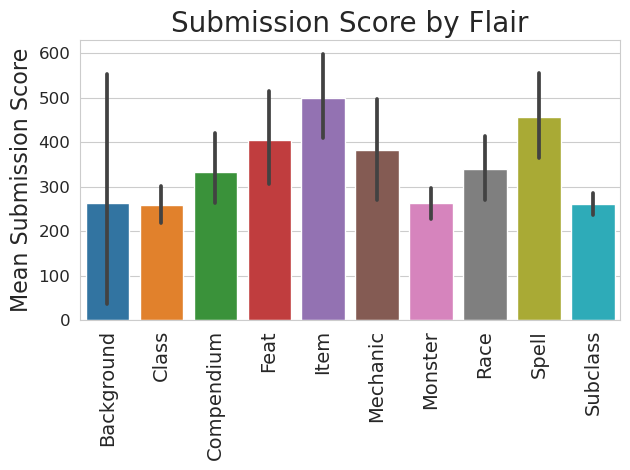

In [13]:
sns.barplot(x="submission_flair", y="submission_score", data=doc_df)
plt.title("Submission Score by Flair", fontsize=20)
plt.ylabel("Mean Submission Score", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_mean_by_flair.pdf'}")

Below we can see some flair types do tend to receive a bit more visibility.

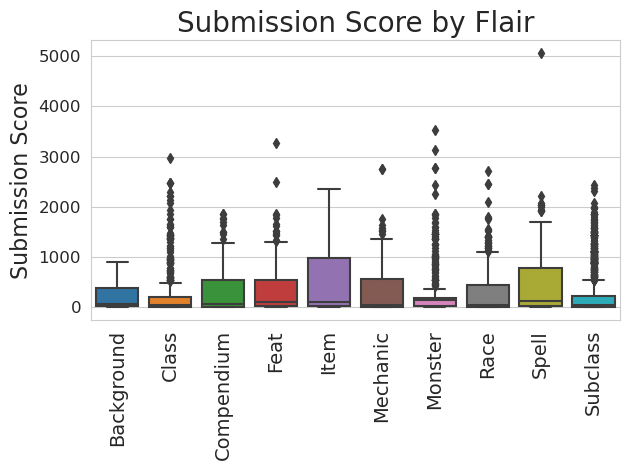

In [14]:
sns.boxplot(x="submission_flair", y="submission_score", data=doc_df)
plt.title("Submission Score by Flair", fontsize=20)
plt.ylabel("Submission Score", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_dist_by_flair.pdf'}")

However, the spread can be quite high and most posts receive relatively few upvotes with long-tailed distributions

### Relation of content to submission
As we learned earlier, since content was also collected from comments, it is not always related to the primary submission.

Let's see how these impacts things

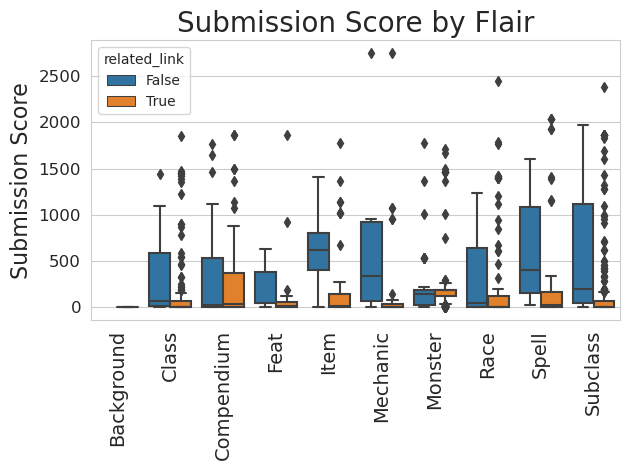

In [15]:
sns.boxplot(
    x="submission_flair",
    y="submission_score",
    hue="related_link",
    data=doc_df[~doc_df["related_link"].isna()],
)
plt.title("Submission Score by Flair", fontsize=20)
plt.ylabel("Submission Score", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_dist_by_flair_and_relation.pdf'}")

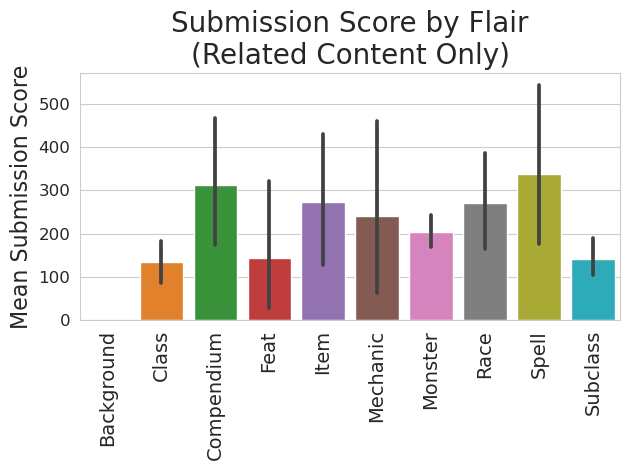

In [16]:
sns.barplot(
    x="submission_flair",
    y="submission_score",
    data=doc_df[doc_df["related_link"] == True],
)
plt.title(
    "Submission Score by Flair\n(Related Content Only)",
    fontsize=20,
)
plt.ylabel("Mean Submission Score", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_mean_by_flair+related.pdf'}")

Clearly it's evident that content not related to the primary submission does not always behave the same as situations where it is related.

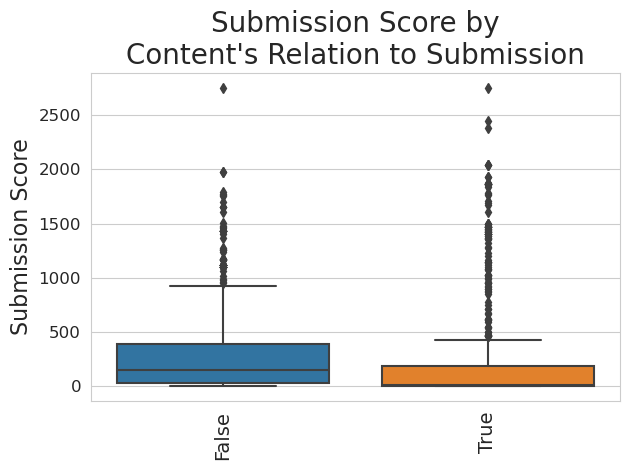

In [17]:
sns.boxplot(
    x="related_link",
    y="submission_score",
    data=doc_df[~doc_df["related_link"].isna()],
)
plt.title("Submission Score by\nContent's Relation to Submission", fontsize=20)
plt.ylabel("Submission Score", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_dist_by_relation.pdf'}")

In particular, it looks like when content is unrelated, it's more often tied to more popular posts (the median score for unrelated content is equal to around the 75th %ile for related content).

This makes some logical sense since this content probably gets more discussion and is potentially more inspiring to other creators, attracting more people to share their own, similar content.

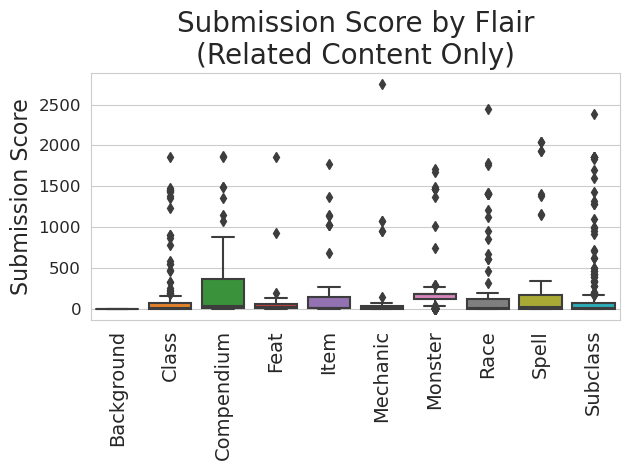

In [18]:
sns.boxplot(
    x="submission_flair",
    y="submission_score",
    data=doc_df[doc_df["related_link"] == True],
)
plt.title(
    "Submission Score by Flair\n(Related Content Only)",
    fontsize=20,
)
plt.ylabel("Submission Score", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvotes_dist_by_flair+related.pdf'}")

If we break things down to only the content actually related to the primary submission, there are more mild differences between flair overall.

What does very clearly is that the two most common types of content -- classes and subclasses -- tend to be less popular overall, but with very long tails.

Also of note, feats are much less popular once we consider only known related content.

## Submission Upvote Ratio

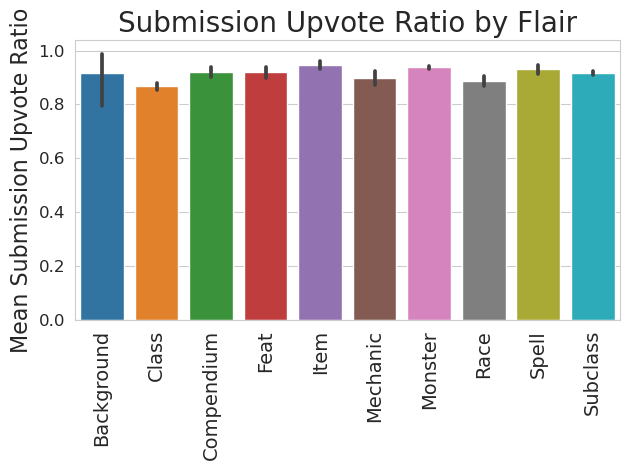

In [19]:
sns.barplot(x="submission_flair", y="submission_upvote_ratio", data=doc_df)
plt.title("Submission Upvote Ratio by Flair", fontsize=20)
plt.ylabel("Mean Submission Upvote Ratio", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvote_ratio_mean_by_flair.pdf'}")

Below we can see some flair types do tend to receive a bit more visibility.

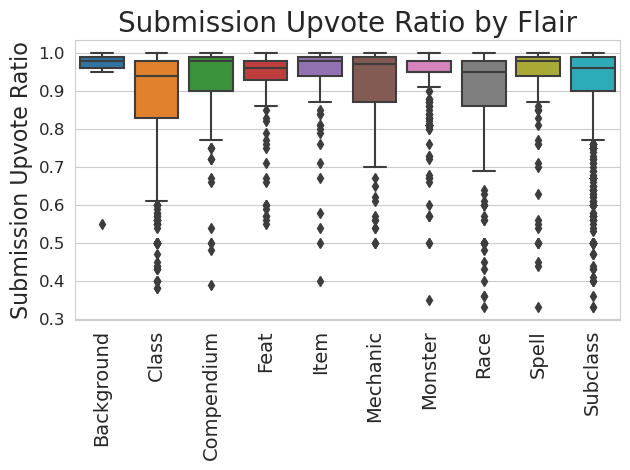

In [20]:
sns.boxplot(x="submission_flair", y="submission_upvote_ratio", data=doc_df)
plt.title("Submission Upvote Ratio by Flair", fontsize=20)
plt.ylabel("Submission Upvote Ratio", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvote_ratio_dist_by_flair.pdf'}")

However, the spread can be quite high and most posts receive relatively few upvotes with long-tailed distributions

### Relation of content to submission
Let's quickly look at how content relation impacts things...

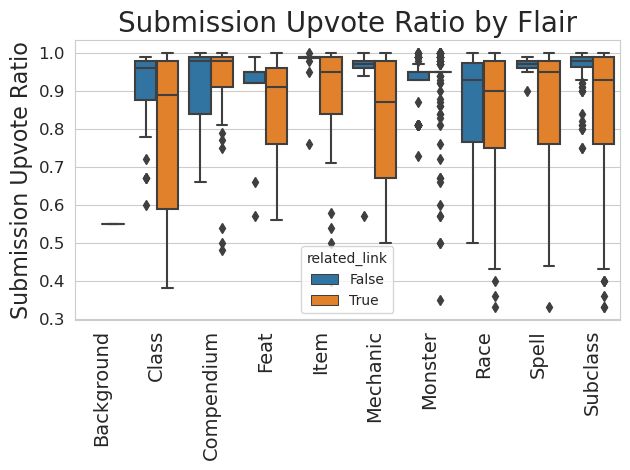

In [21]:
sns.boxplot(
    x="submission_flair",
    y="submission_upvote_ratio",
    hue="related_link",
    data=doc_df[~doc_df["related_link"].isna()],
)
plt.title("Submission Upvote Ratio by Flair", fontsize=20)
plt.ylabel("Submission Upvote Ratio", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvote_ratio_dist_by_flair_and_relation.pdf'}")

Again, we see a difference, where un-related content appears to be marginally more popular.

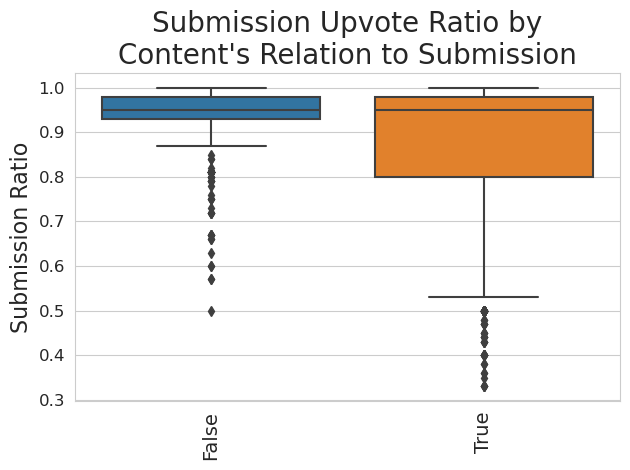

In [22]:
sns.boxplot(
    x="related_link",
    y="submission_upvote_ratio",
    data=doc_df[~doc_df["related_link"].isna()],
)
plt.title("Submission Upvote Ratio by\nContent's Relation to Submission", fontsize=20)
plt.ylabel("Submission Ratio", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvote_ratio_dist_by_relation.pdf'}")

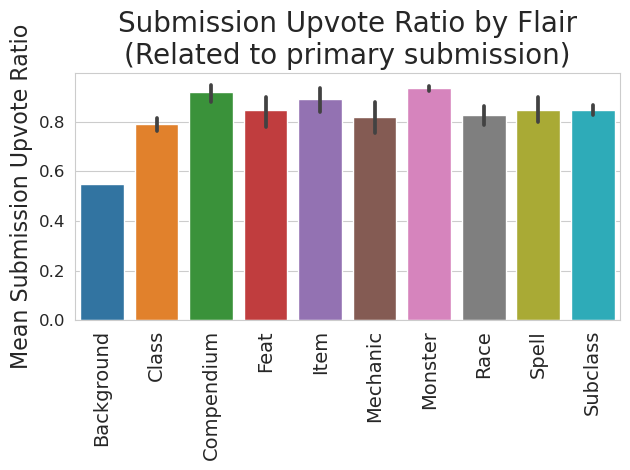

In [23]:
sns.barplot(
    x="submission_flair",
    y="submission_upvote_ratio",
    data=doc_df[doc_df["related_link"] == True],
)
plt.title(
    "Submission Upvote Ratio by Flair\n(Related to primary submission)",
    fontsize=20,
)
plt.ylabel("Mean Submission Upvote Ratio", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvote_ratio_mean_by_flair+related.pdf'}")

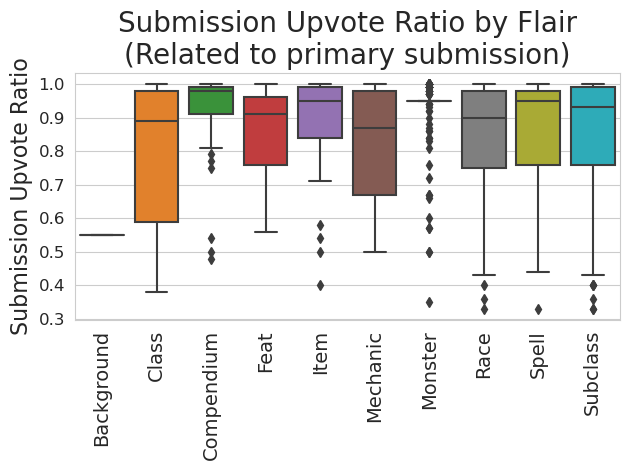

In [24]:
sns.boxplot(
    x="submission_flair",
    y="submission_upvote_ratio",
    data=doc_df[doc_df["related_link"] == True],
)
plt.title(
    "Submission Upvote Ratio by Flair\n(Related to primary submission)",
    fontsize=20,
)
plt.ylabel("Submission Upvote Ratio", fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(f"{SUBMISION_METRICS/'upvote_ratio_dist_by_flair+related.pdf'}")